In [1]:
from utils import *
import autoencoder
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
%load_ext autoreload
%autoreload 2

# Autoencoder

In [10]:
def plot_progress(model, epoch):
    cpu_model = model.cpu()
    with torch.no_grad():
        x1_hat = cpu_model(torch.Tensor(x1[None, :]))[0].cpu()
        x2_hat = cpu_model(torch.Tensor(x2[None, :]))[0].cpu()
    fig1, axes1 = plt.subplots(2, 6, figsize = (20, 6))
    fig1.suptitle(f'Epoch {epoch}')
    for i in range(6):
        axes1[0, i].imshow(x1[i])
        axes1[1, i].imshow(x2[i])
    #     axes1[0, i].axis('off')
    #     axes1[1, i].axis('off')
        axes1[0,i].set_yticklabels([])
        axes1[0,i].set_xticklabels([])
        axes1[1,i].set_yticklabels([])
        axes1[1,i].set_xticklabels([])
    axes1[0, 0].set_ylabel('x1')
    axes1[1, 0].set_ylabel('x2')
    fig2, axes2 = plt.subplots(2, 6, figsize = (20, 6))
    for i in range(6):
        axes2[0, i].imshow(x1_hat[i])
        axes2[1, i].imshow(x2_hat[i])
        axes2[0,i].set_yticklabels([])
        axes2[0,i].set_xticklabels([])
        axes2[1,i].set_yticklabels([])
        axes2[1,i].set_xticklabels([])
    axes2[0, 0].set_ylabel('x1_hat')
    _=axes2[1, 0].set_ylabel('x2_hat')

In [2]:
train_images, train_labels = load_controls(splits=['train'], collapse=True)
train_images= np.moveaxis(train_images, -1, 1)
train_images_noncollapsed, _ = load_controls(splits=['train'], collapse=False)
train_images_noncollapsed = np.moveaxis(train_images_noncollapsed, -1, -3)

In [3]:
train_ds = TensorDataset(torch.Tensor(train_images))

In [4]:
train_loader = DataLoader(train_ds, batch_size=4)

In [13]:
model = autoencoder.get_model()

In [14]:
sirna = 10
x1 = train_images_noncollapsed[2, 1, sirna, 0]
x2 = train_images_noncollapsed[1, 2, sirna, 1]

In [19]:
num_epochs=5

In [30]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
for epoch in range(num_epochs):
    model = model.cuda()
    for i, (x,) in tqdm(enumerate(train_loader), total=len(train_loader)):
        x = x.cuda()
        optimizer.zero_grad()
        x_hat = model(x)
        loss = criterion(x_hat, x)
        loss.backward()
        optimizer.step()
        if (i+1) % (len(train_loader)//10) == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                     .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

Epoch [1/5], Step [23/232], Loss: 0.0050
Epoch [1/5], Step [46/232], Loss: 0.0052
Epoch [1/5], Step [69/232], Loss: 0.0073
Epoch [1/5], Step [92/232], Loss: 0.0017
Epoch [1/5], Step [115/232], Loss: 0.0020
Epoch [1/5], Step [138/232], Loss: 0.0003
Epoch [1/5], Step [161/232], Loss: 0.0010
Epoch [1/5], Step [184/232], Loss: 0.0007
Epoch [1/5], Step [207/232], Loss: 0.0004
Epoch [1/5], Step [230/232], Loss: 0.0006



Epoch [2/5], Step [23/232], Loss: 0.0042
Epoch [2/5], Step [46/232], Loss: 0.0048
Epoch [2/5], Step [69/232], Loss: 0.0048
Epoch [2/5], Step [92/232], Loss: 0.0013
Epoch [2/5], Step [115/232], Loss: 0.0009
Epoch [2/5], Step [138/232], Loss: 0.0004
Epoch [2/5], Step [161/232], Loss: 0.0006
Epoch [2/5], Step [184/232], Loss: 0.0008
Epoch [2/5], Step [207/232], Loss: 0.0005
Epoch [2/5], Step [230/232], Loss: 0.0006



Epoch [3/5], Step [23/232], Loss: 0.0051
Epoch [3/5], Step [46/232], Loss: 0.0056
Epoch [3/5], Step [69/232], Loss: 0.0046
Epoch [3/5], Step [92/232], Loss: 0.0011
Epoch [3/5], Step [115/232], Loss: 0.0011
Epoch [3/5], Step [138/232], Loss: 0.0005
Epoch [3/5], Step [161/232], Loss: 0.0006
Epoch [3/5], Step [184/232], Loss: 0.0008
Epoch [3/5], Step [207/232], Loss: 0.0005
Epoch [3/5], Step [230/232], Loss: 0.0005



Epoch [4/5], Step [23/232], Loss: 0.0043
Epoch [4/5], Step [46/232], Loss: 0.0049
Epoch [4/5], Step [69/232], Loss: 0.0046
Epoch [4/5], Step [92/232], Loss: 0.0010
Epoch [4/5], Step [115/232], Loss: 0.0014
Epoch [4/5], Step [138/232], Loss: 0.0008
Epoch [4/5], Step [161/232], Loss: 0.0005
Epoch [4/5], Step [184/232], Loss: 0.0008
Epoch [4/5], Step [207/232], Loss: 0.0004
Epoch [4/5], Step [230/232], Loss: 0.0005



Epoch [5/5], Step [23/232], Loss: 0.0046
Epoch [5/5], Step [46/232], Loss: 0.0042
Epoch [5/5], Step [69/232], Loss: 0.0082
Epoch [5/5], Step [92/232], Loss: 0.0021
Epoch [5/5], Step [115/232], Loss: 0.0010
Epoch [5/5], Step [138/232], Loss: 0.0006
Epoch [5/5], Step [161/232], Loss: 0.0006
Epoch [5/5], Step [184/232], Loss: 0.0008
Epoch [5/5], Step [207/232], Loss: 0.0005
Epoch [5/5], Step [230/232], Loss: 0.0005



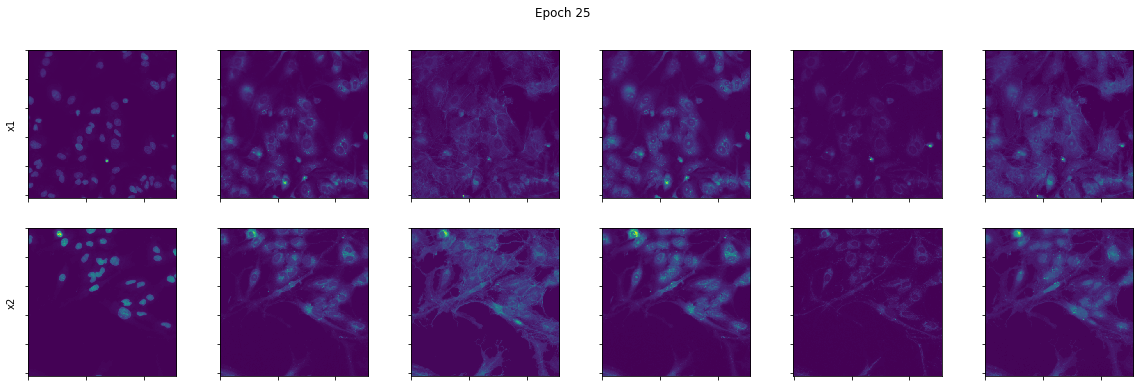

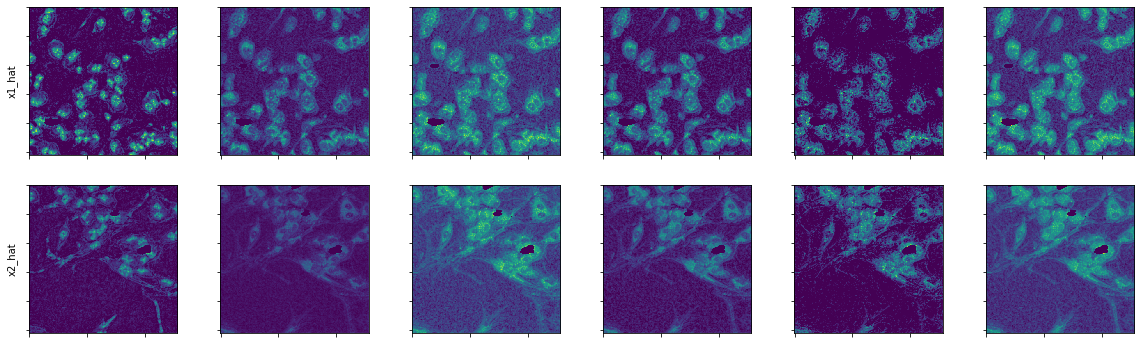

In [31]:
plot_progress(model, 25)

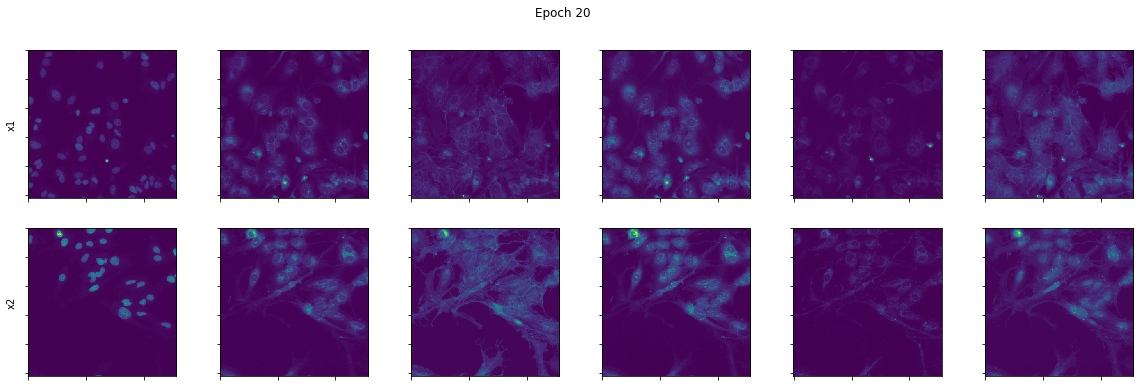

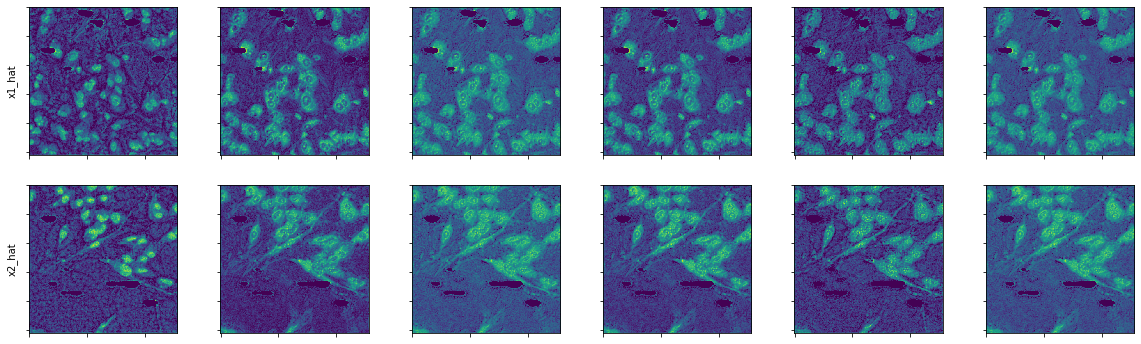

In [29]:
plot_progress(model, 20)

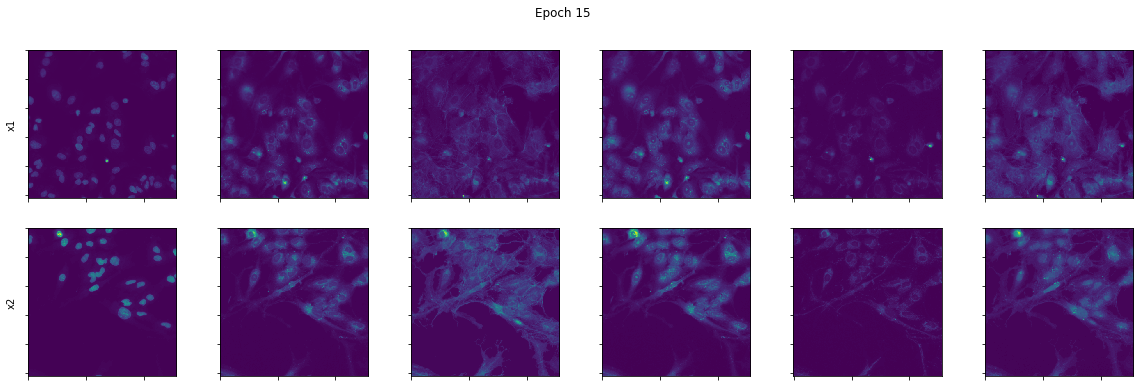

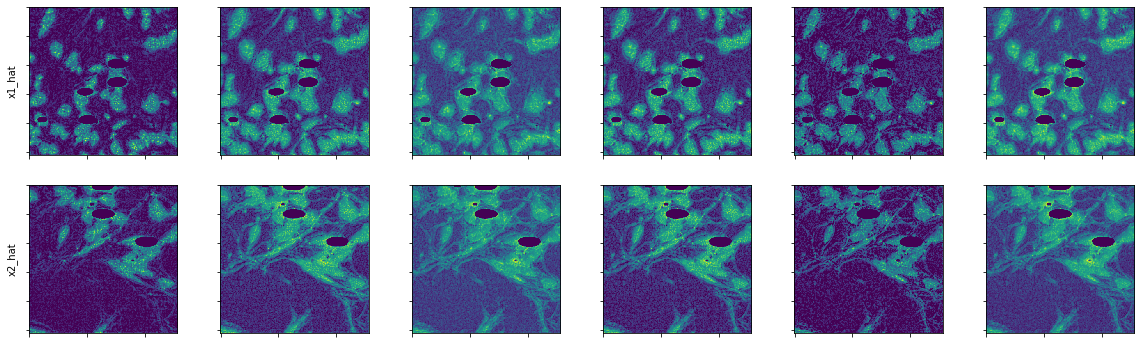

In [27]:
plot_progress(model, 15)

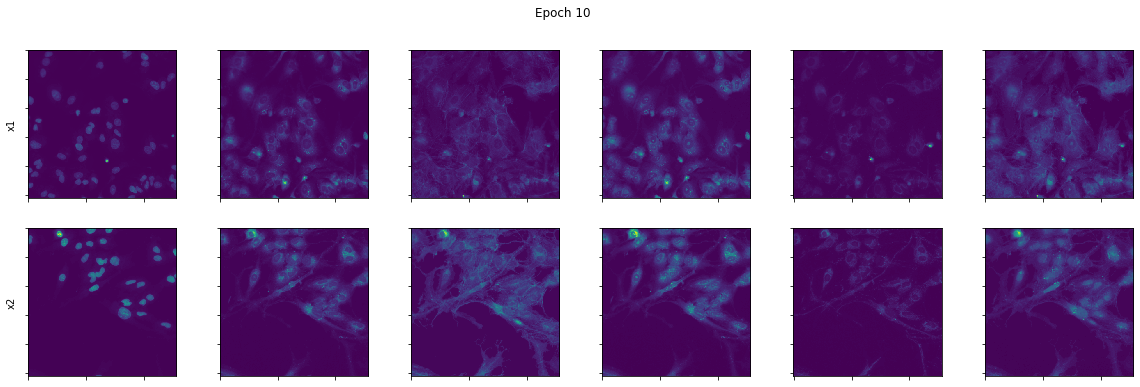

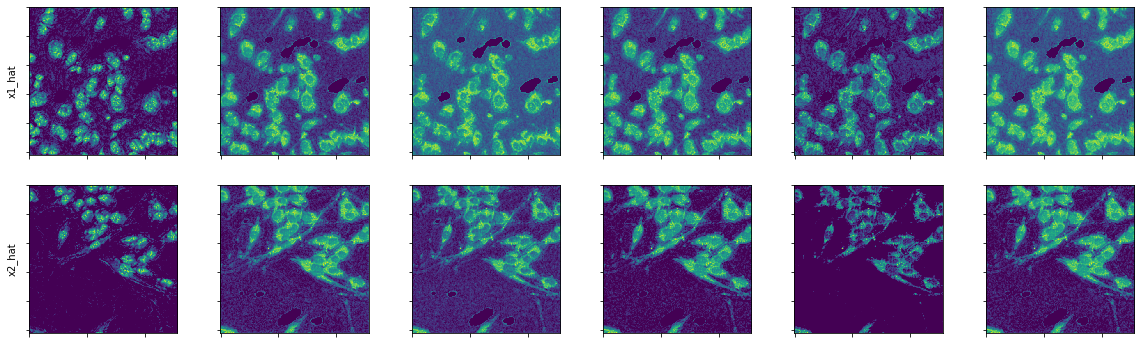

In [24]:
plot_progress(model, 10)

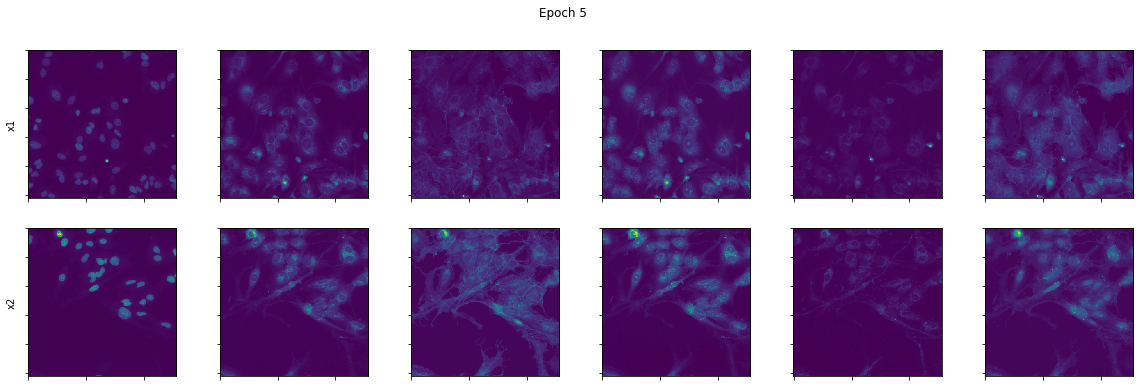

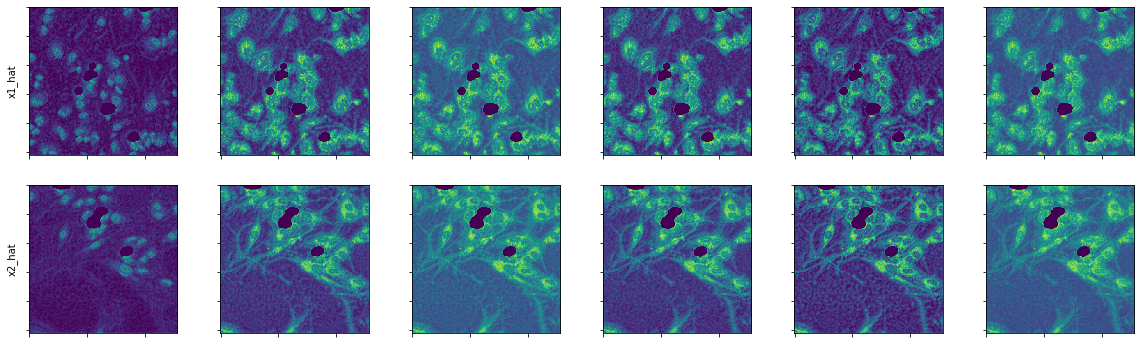

In [22]:
plot_progress(model, 5)